In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('/home/buhmae/3_erum_data_data/erum_data_data/erum_data_data')
import importlib
import erum_data_data as edd
importlib.reload(edd)

# or just:
#import erum_data_data as edd

print('imports dones')

imports dones


In [3]:
# dataset description
edd.print_description('top')


Top tagging dataset.

Description:
14 TeV, hadronic tops for signal, QCD djets background, Delphes ATLAS detector card with Pythia. No MPI/pile-up included
Particle-flow entries (produced by Delphes E-flow) have been clustered into anti-kT 0.8 jets in the pT range [550,650].
All top jets are matched to a parton-level top within ∆R = 0.8, and to all top decay partons within 0.8. Also,|eta|_jet < 2 has been required.

Ref: 
Deep-learned Top Tagging with a Lorentz Layer by A Butter, G Kasieczka, T and M Russell (arXiv: 1707.08966)

Dataset shape:
~2M events have been stored divided between training (~1.6M) and test (~400k)) and the shape of the dataset is (# of events, 200, 4).
The feature represent the leading 200 jet constituent four-momenta, with zero-padding for jets that have less than 200.
Constituents are sorted by pT, with the highest pT one first.

The second dataset that is included is just a flag "ttv" to identify what the event was before the reshaping operated by us. Here a 

In [4]:
# load training and testing set
X_train, y_train = edd.load('top', 'train', cache_dir = '/home/buhmae/3_erum_data_data/erum_data_data', cache_subdir = 'datasets')
X_test, y_test = edd.load('top', 'test', cache_dir = '/home/buhmae/3_erum_data_data/erum_data_data', cache_subdir = 'datasets')

In [5]:
# checking basic content

print(len(X_train))
print(len(X_test))

print(X_train[0].shape)
print(X_train[1].shape)   # 'ttv' labels not necessary for training

print(y_train.shape)
print(y_test.shape)

2
2
(1614000, 200, 4)
(1614000,)
(1614000,)
(404000,)


# some basic plots

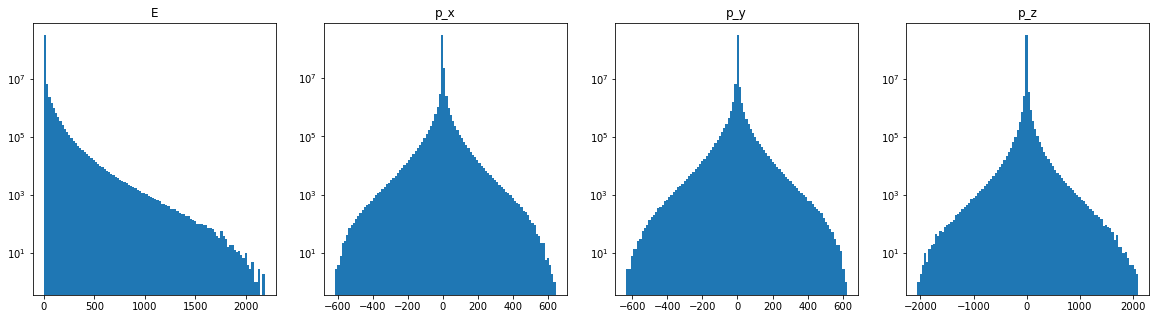

In [9]:
# the features - zeropadded
X = X_train[0]

label_list = ['E', 'p_x', 'p_y', 'p_z']

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
for i, (name, ax) in enumerate(zip(label_list, np.array(axs).ravel())):
    ax.hist(X[:,:,i].ravel(), bins=100)
    ax.set_title(name)
    ax.set_yscale("log")

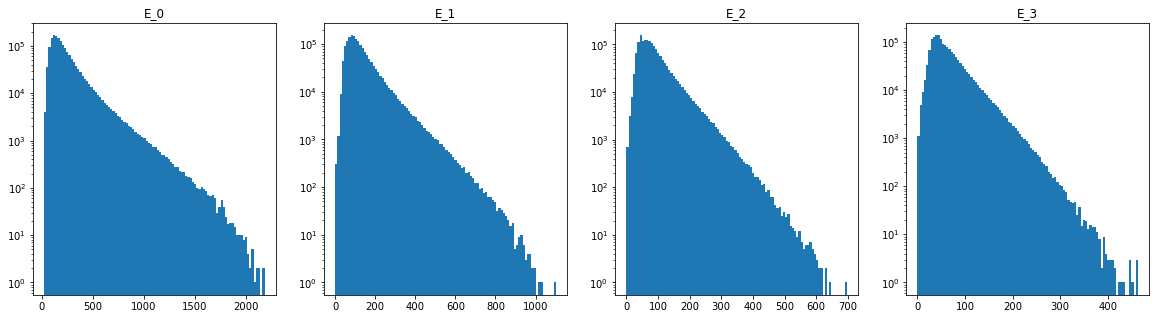

In [10]:
# energy of first 4 leading jets
X = X_train[0]

label_list = ['E_0', 'E_1', 'E_2', 'E_3',]

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
for i, (name, ax) in enumerate(zip(label_list, np.array(axs).ravel())):
    ax.hist(X[:,i,0].ravel(), bins=100)
    ax.set_title(name)
    ax.set_yscale("log")

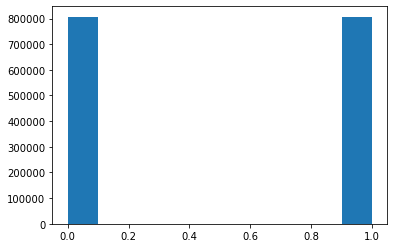

In [8]:
# labels
plt.clf()
plt.hist(y_train, bins = 10)
plt.show()